In [1]:
%pip install -r requirements.txt

  Using cached puncc-0.8.0-py3-none-any.whl.metadata (13 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 19.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 46.8 MB/s eta 0:00:00:00:01
Using cached puncc-0.8.0-py3-none-any.whl (70 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 45.3 MB/s eta 0:00:00
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl (24.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.8 MB/s eta 0:00:00
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
Using cached tqdm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


# Set random seed for reproducibility
tf.random.set_seed(0)
tf.keras.utils.set_random_seed(0)

2025-02-10 20:30:29.588740: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 20:30:29.801344: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-10 20:30:29.931437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739219430.069627   44869 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739219430.122110   44869 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-10 20:30:30.409027: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
tf.__version__

'2.18.0'

In [4]:
import keras
print(keras.__version__)

3.8.0


# Load dataset

In [5]:
df = pd.read_csv("iris_synthetic_data.csv")
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


In [13]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64

In [14]:
class_mapping = {label:idx for idx, label in enumerate(df['label'].unique())}
class_mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [16]:
df['classlabel'] = df['label'].map(class_mapping)
df.head()

,sepal length,sepal width,petal length,petal width,label,classlabel
0,5.2,3.8,1.5,0.3,Iris-setosa,0
1,5.3,4.1,1.5,0.1,Iris-setosa,0
2,4.8,3.1,1.5,0.2,Iris-setosa,0
3,5.2,3.7,1.5,0.2,Iris-setosa,0
4,4.9,3.0,1.5,0.3,Iris-setosa,0


In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,:-2].values, df.iloc[:,-1].values
# print (X[0],y[0])

# split train test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Calibration data
X_train, X_calib, y_train, y_calib = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0
)

# normalize X
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)
X_calib_norm = mms.fit_transform(X_calib)
print(X_train_norm[0:2], X_train_norm[0:2].shape)
print(X_train_norm.shape, X_test_norm.shape, X_calib_norm.shape)


[[0.34285714 0.375      0.43103448 0.5       ]
 [0.28571429 0.58333333 0.0862069  0.04166667]] (2, 4)
(1687, 4) (750, 4) (563, 4)


Text(0.5, 1.0, 'petal length')

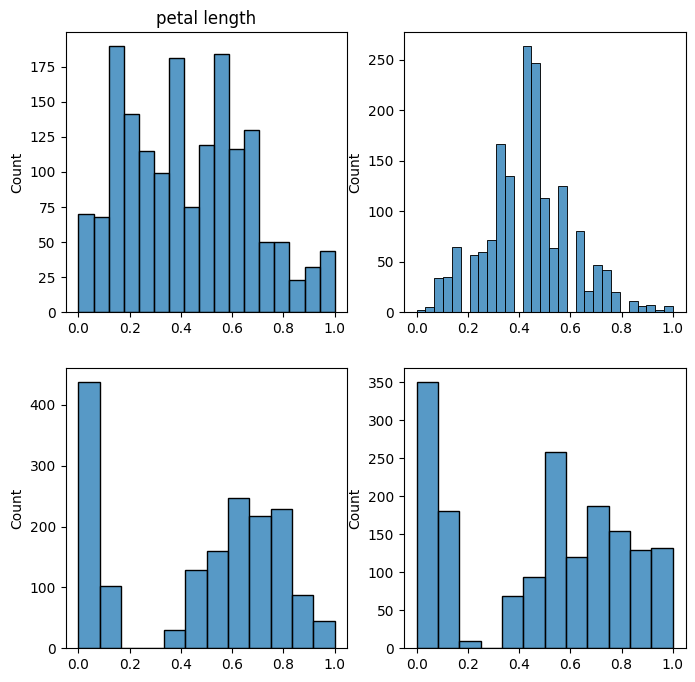

In [45]:
# plot distribution of X
fig, axes = plt.subplots(2,2, figsize=(8,8))

sns.histplot(x=X_train_norm[:,0], ax=axes[0,0])
axes[0,0].set_title('sepal length')
sns.histplot(x=X_train_norm[:,1], ax=axes[0,1])
axes[0,0].set_title('sepal width')
sns.histplot(x=X_train_norm[:,2], ax=axes[1,0])
axes[0,0].set_title('petal length')
sns.histplot(x=X_train_norm[:,3], ax=axes[1,1])
axes[0,0].set_title('petal length')


# Classification model

In [56]:
# Classification model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation="softmax"),
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    X_train_norm,
    y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3462 - loss: 1.2759 - val_accuracy: 0.3314 - val_loss: 1.2056
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4029 - loss: 1.1854 - val_accuracy: 0.3728 - val_loss: 1.1259
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3520 - loss: 1.1010 - val_accuracy: 0.6124 - val_loss: 1.0133
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6255 - loss: 0.9874 - val_accuracy: 0.6538 - val_loss: 0.9218
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - loss: 0.9033 - val_accuracy: 0.6538 - val_loss: 0.8492
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 0.8334 - val_accuracy: 0.6568 - val_loss: 0.7827
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.7693 - val_accuracy: 0.6568 - val_loss: 0.7225
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6557 - loss: 0.7117 - val_accuracy: 0.6568 - val_loss: 0.6697
Epo

# Conformal prediction

In [57]:
from deel.puncc.api.prediction import BasePredictor
from deel.puncc.classification import APS

# Instantiation
model_cp = APS(model, train=False) 

In [59]:
# Calibration
model_cp.fit(X_calib=X_calib_norm,y_calib=y_calib)

 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [60]:
# Conformal inference
alpha = 0.05

y_pred, set_pred = model_cp.predict(X_test_norm, alpha=alpha)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [61]:
print(y_pred[0])
print(np.max(y_pred[0]))
print(np.argmax(y_pred[0]))

[0.8255694  0.11702345 0.04765317 0.00975399]
0.8255694
0


In [63]:
sample = 20

# sort y_pred[sample] in reversed order
ranked_pred = y_pred[sample].argsort()[::-1]

# Get prediction probabilities for elements in set_pred
probs = [y_pred[sample][i] for i in set_pred[sample]]

# Format probabilities for display
prob_str = ", ".join([f"{i:.2f}" for i in probs])

print(f"Point prediction: {np.argmax(y_pred[sample])} \n "
    + f"Prediction set: {set_pred[sample]} \n True label: {y_test[sample]} \n"
    + f"Prediction Probabilities: {prob_str}")  # Add probabilities to the title)

Point prediction: 2 
 Prediction set: [np.int64(2)] 
 True label: 2 
Prediction Probabilities: 0.59


In [64]:
from deel.puncc import metrics

mean_coverage = metrics.classification_mean_coverage(y_test, set_pred)
mean_size = metrics.classification_mean_size(set_pred)

print(f"Empirical coverage : {mean_coverage:.2f}")
print(f"Average set size : {mean_size:.2f}")

Empirical coverage : 0.95
Average set size : 1.68


In [66]:
# Get nonconformity scores
nonconf_scores = model_cp.conformal_predictor.get_nonconformity_scores()[0]

# Size of the calibration set
n = len(nonconf_scores)

# Compute the calibrated treshold
calibrated_treshold = np.quantile(
    nonconf_scores, (1 - alpha) * (n + 1) / n, method="inverted_cdf"
)

print(f"Uncalibrated treshold : {1-alpha:.2f}")
print(f"Calibrated treshold : {calibrated_treshold:.2f}")

Uncalibrated treshold : 0.95
Calibrated treshold : 0.84
